In [1]:
import numpy as np

In [2]:
import numpy.random as npr

In [4]:
n1 = 38
n2 = 22
sd1 = 1.11
sd2 =1.84
m1 = 0
m2 = 0

In [5]:
x = npr.normal(m1,sd1,n1)
y = npr.normal(m2,sd2,n2)

In [6]:
import statsmodels.stats.weightstats as smw

In [7]:
smw.ttest_ind(x,y,usevar='pooled')

(0.346392712692095, 0.7303011178044018, 58.0)

In [8]:
smw.ttest_ind(x,y,usevar='unequal')

(0.30928062550441976, 0.7591618164178463, 31.235487049110514)

In [10]:
import pingouin as pg

In [12]:
pg.mwu(x,y)

,U-val,alternative,p-val,RBC,CLES
MWU,485.0,two-sided,0.307679,-0.160287,0.580144


In [14]:
pg.mwu(x,y, method='exact')

,U-val,alternative,p-val,RBC,CLES
MWU,485.0,two-sided,0.310348,-0.160287,0.580144


In [31]:
n1 = 38
n2 = 22
sd1 = 1.11
sd2 =1.84
m1 = 0
m2 = 0

In [32]:
p1 = [] # t test
p2 = [] # Welch
p3 = [] # MW
nSims = 1000
for i in range(nSims):
    x = npr.normal(m1,sd1,n1)
    y = npr.normal(m2,sd2,n2)
    p1.append(smw.ttest_ind(x,y,usevar='pooled')[1])
    p2.append(smw.ttest_ind(x,y,usevar='unequal')[1])
    p3.append(pg.mwu(x,y, method='exact').iloc[0,2])

In [17]:
import matplotlib.pyplot as plt

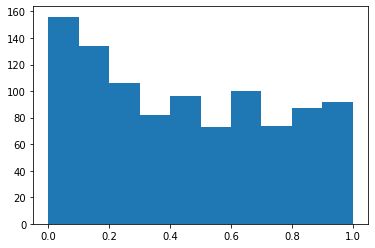

In [23]:
plt.hist(p1);

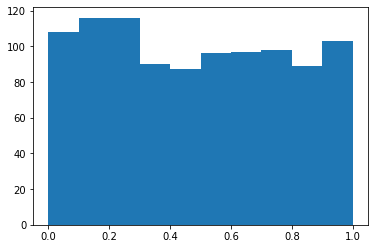

In [24]:
plt.hist(p2);

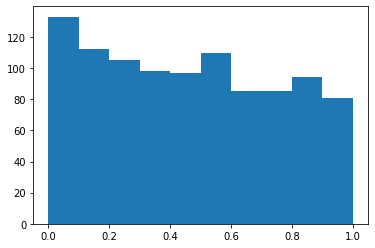

In [25]:
plt.hist(p3);

In [27]:
errorrate = sum(np.array(p1)<0.05)/nSims * 100
errorrate

8.3

In [29]:
errorrate = sum(np.array(p2)<0.05)/nSims * 100
errorrate

5.1

In [30]:
errorrate = sum(np.array(p3)<0.05)/nSims * 100
errorrate

6.2

In [43]:
n1 = 38
n2 = 22
sd1 = 1.11
sd2 =1.84
m1 = 0
m2 = 1

pow1 = []
pow2 = []
pow3 = []

for j in [0.1,0.5,1,2]:
    p1 = [] # t test
    p2 = [] # Welch
    p3 = [] # MW
    nSims = 1000
    m1 = 0
    m2 = j
    for i in range(nSims):
        x = npr.normal(m1,sd1,n1)
        y = npr.normal(m2,sd2,n2)
        p1.append(smw.ttest_ind(x,y,usevar='pooled')[1])
        p2.append(smw.ttest_ind(x,y,usevar='unequal')[1])
        p3.append(pg.mwu(x,y, method='exact').iloc[0,2])
        
    pow1.append(sum(np.array(p1)<0.05)/nSims * 100)
    pow2.append(sum(np.array(p2)<0.05)/nSims * 100)
    pow3.append(sum(np.array(p3)<0.05)/nSims * 100)

In [40]:
power = sum(np.array(p1)<0.05)/nSims * 100
power

72.6

In [41]:
power = sum(np.array(p2)<0.05)/nSims * 100
power

63.2

In [42]:
power = sum(np.array(p3)<0.05)/nSims * 100
power

66.10000000000001

In [44]:
import pandas as pd

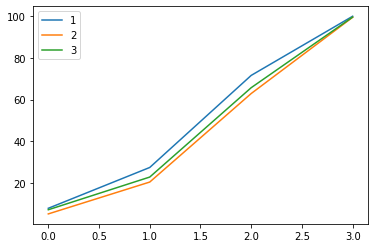

In [55]:
plt.plot(pd.DataFrame([pow1,pow2,pow3]).T);
plt.legend([1,2,3])
# plt.xticks([0.1,0.5,1,2])

In [69]:
n1 = 38
n2 = 22
sd1 = 1.11
sd2 =1.84
m1 = 0
m2 = 1

pow1 = []
pow2 = []
pow3 = []

for j in [5,10,30,50]:
    p1 = [] # t test
    p2 = [] # Welch
    p3 = [] # MW
    nSims = 1000
    m1 = 0
    m2 = 1
    for i in range(nSims):
        x = npr.normal(m1,sd1,j)
        y = npr.normal(m2,sd2,j)
        p1.append(smw.ttest_ind(x,y,usevar='pooled')[1])
        p2.append(smw.ttest_ind(x,y,usevar='unequal')[1])
        p3.append(pg.mwu(x,y, method='exact').iloc[0,2])
        
    pow1.append(sum(np.array(p1)<0.05)/nSims * 100)
    pow2.append(sum(np.array(p2)<0.05)/nSims * 100)
    pow3.append(sum(np.array(p3)<0.05)/nSims * 100)

In [70]:
pd1 = pd.DataFrame([pow1,pow2,pow3]).T
pd1.index = [5,10,30,50]

In [71]:
pd1

,0,1,2
5,15.3,13.1,10.4
10,29.2,28.4,26.0
30,70.5,70.1,67.7
50,91.1,91.1,89.0


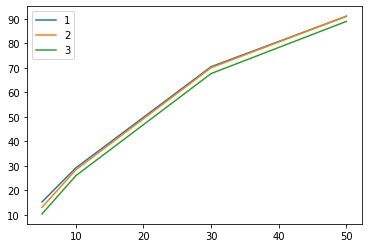

In [72]:
plt.plot(pd1);
plt.legend([1,2,3])
# plt.xticks([0.1,0.5,1,2])

In [73]:
n1 = 38
n2 = 22
sd1 = 1.11
sd2 =1.84
m1 = 0
m2 = 1

pow1 = []
pow2 = []
pow3 = []

for j in [5,10,30,50]:
    p1 = [] # t test
    p2 = [] # Welch
    p3 = [] # MW
    nSims = 1000
#     m1 = 0
#     m2 = 1
    for i in range(nSims):
        x = npr.exponential(1,j)
        y = npr.exponential(5,j)
        p1.append(smw.ttest_ind(x,y,usevar='pooled')[1])
        p2.append(smw.ttest_ind(x,y,usevar='unequal')[1])
        p3.append(pg.mwu(x,y, method='exact').iloc[0,2])
        
    pow1.append(sum(np.array(p1)<0.05)/nSims * 100)
    pow2.append(sum(np.array(p2)<0.05)/nSims * 100)
    pow3.append(sum(np.array(p3)<0.05)/nSims * 100)

In [74]:
pd1 = pd.DataFrame([pow1,pow2,pow3]).T
pd1.index = [5,10,30,50]

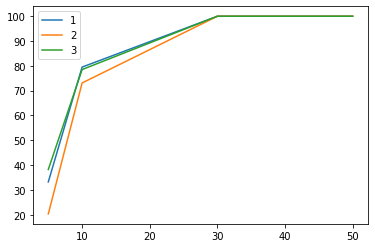

In [75]:
plt.plot(pd1);
plt.legend([1,2,3])
# plt.xticks([0.1,0.5,1,2])

In [76]:
n1 = 38
n2 = 22
sd1 = 1.11
sd2 =1.84
m1 = 0
m2 = 1

pow1 = []
pow2 = []
pow3 = []

for j in [5,10,30,50]:
    p1 = [] # t test
    p2 = [] # Welch
    p3 = [] # MW
    nSims = 1000
#     m1 = 0
#     m2 = 1
    for i in range(nSims):
        x = npr.uniform(0,1,j)
        y = npr.uniform(0.2,1.2,j)
        p1.append(smw.ttest_ind(x,y,usevar='pooled')[1])
        p2.append(smw.ttest_ind(x,y,usevar='unequal')[1])
        p3.append(pg.mwu(x,y, method='exact').iloc[0,2])
        
    pow1.append(sum(np.array(p1)<0.05)/nSims * 100)
    pow2.append(sum(np.array(p2)<0.05)/nSims * 100)
    pow3.append(sum(np.array(p3)<0.05)/nSims * 100)

In [77]:
pd1 = pd.DataFrame([pow1,pow2,pow3]).T
pd1.index = [5,10,30,50]

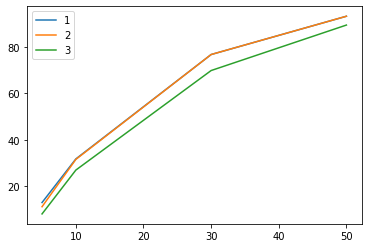

In [78]:
plt.plot(pd1);
plt.legend([1,2,3])
# plt.xticks([0.1,0.5,1,2])

In [79]:
n1 = 38
n2 = 22
sd1 = 1.11
sd2 =1.84
m1 = 0
m2 = 1

pow1 = []
pow2 = []
pow3 = []

for j in [5,10,30,50]:
    p1 = [] # t test
    p2 = [] # Welch
    p3 = [] # MW
    nSims = 1000
#     m1 = 0
#     m2 = 1
    for i in range(nSims):
        x = npr.uniform(0,1,j)
        x[4] = 13
        y = npr.uniform(0.2,1.2,j)
        y[2] = -2
        p1.append(smw.ttest_ind(x,y,usevar='pooled')[1])
        p2.append(smw.ttest_ind(x,y,usevar='unequal')[1])
        p3.append(pg.mwu(x,y, method='exact').iloc[0,2])
        
    pow1.append(sum(np.array(p1)<0.05)/nSims * 100)
    pow2.append(sum(np.array(p2)<0.05)/nSims * 100)
    pow3.append(sum(np.array(p3)<0.05)/nSims * 100)

In [83]:
# p1

In [80]:
pd1 = pd.DataFrame([pow1,pow2,pow3]).T
pd1.index = [5,10,30,50]

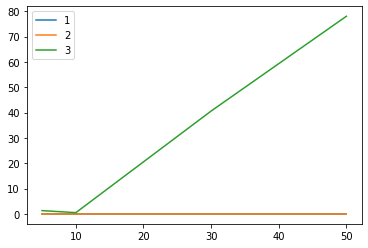

In [81]:
plt.plot(pd1);
plt.legend([1,2,3])
# plt.xticks([0.1,0.5,1,2])